# Auto-Sklearn vs sklearn 

El objetivo de esta tarea es comparar Auto-Sklearn con sklearn. Prograqmaremos dos códigos para cada tipo de clasificación, uno con autoSklearn y otro con sklearn. Gracias a ello podremos ver el tiempo que nos ahorramos de entrenamiento del modelo, etc. Fuente: https://www.architecture-performance.fr/

### Instalación de paquetes

In [ ]:
!apt-get install swig -y
!pip install Cython numpy


# sometimes you have to run the next command twice on colab
# I haven't figured out why
!pip install auto-sklearn

In [ ]:
!pip install pandas==0.25
!pip uninstall arff
!pip uninstall liac-arff
!pip install liac-arff

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
import matplotlib.pyplot as plt

In [5]:
from sklearn import datasets
## Load the digits dataset: digits
digits = datasets.load_digits()

# Primer Modelo. Clasificación Multiclase

### Carga de datos


Esta es una descripción del conjunto de datos de dígitos escritos a mano de UCI ML: cada punto de datos es una imagen de 8x8 de un dígito. Sin embargo, solo tenemos un subconjunto (copia del conjunto de prueba) incluido en scikit-learn


In [6]:
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

In [7]:
# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


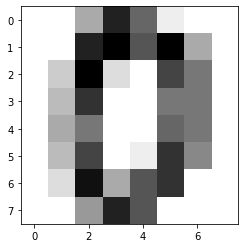

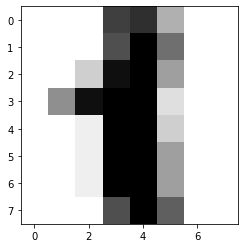

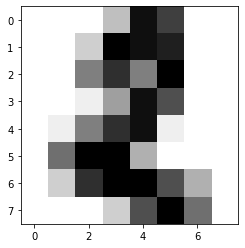

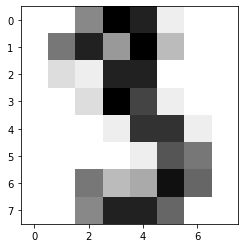

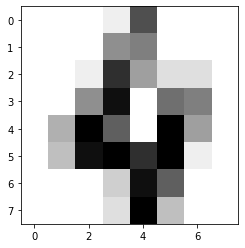

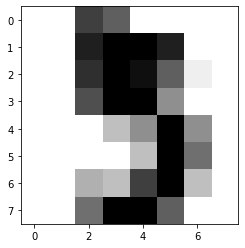

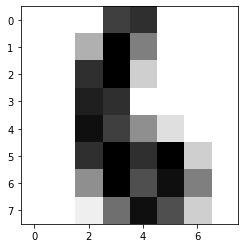

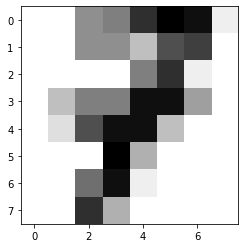

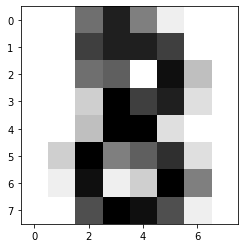

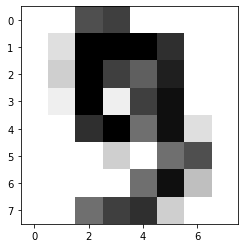

In [10]:
# Display digit 1010
for i in range(10):
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

## Codigo de sklearn

In [12]:
%%time
import sklearn.datasets
from sklearn.metrics import accuracy_score
from sklearn import svm

X, y = sklearn.datasets.load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1)


Accuracy score:  0.991
Wall time: 188 ms


In [ ]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)
classifier.fit(X_train, y_train)
y_hat = classifier.predict(X_test)

In [ ]:
print(f"Accuracy score: {accuracy_score(y_test, y_hat): 6.3f}")

## Auto-sklearn

In [13]:
import autosklearn.classification
import sklearn.model_selection
import sklearn.datasets
from sklearn.metrics import accuracy_score

X, y = sklearn.datasets.load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1)


ModuleNotFoundError: No module named 'autosklearn'

In [ ]:
automl = autosklearn.classification.AutoSklearnClassifier()
automl.fit(X_train, y_train)
y_hat = automl.predict(X_test)

In [ ]:
print(f"Accuracy score: {accuracy_score(y_test, y_hat): 6.3f}")

vamos a utilizar 4 cores

In [ ]:
automl = autosklearn.classification.AutoSklearnClassifier(n_jobs=4)
automl.fit(X_train, y_train)
y_hat = automl.predict(X_test)
print(f"Accuracy score: {accuracy_score(y_test, y_hat): 6.3f}")

# Segundo Modelo. Clasificación binaria

Esta es una descripción del conjunto de datos (diagnóstico) de cáncer de mama de Wisconsin: cada punto de datos es una colección de medidas geométricas de una masa mamaria calculada a partir de una imagen digitalizada.

### Sklearn: Algoritmo básico de regresión logística

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

RS = 124  # random seed

data = load_breast_cancer()

print(data.keys())
print(data.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were c

In [16]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
df['target'] = data.target
df.target = 1 - df.target
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=RS)

### Ejercicio 1

Programa un modelo de clasificacion, por ejemplo uno de regresion logistica,con las transformaciones pertinentes de los datos. Te recomendamos que no utilices la estandarizacion si no que RobustScaler (funciona mejor en la regresion)

### Auto-Sklearn. Modelos de clasificación

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import autosklearn.classification
import sklearn.datasets
from sklearn.metrics import accuracy_score, roc_auc_score

RS = 124  # random seed

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [ ]:
df['target'] = data.target
df.target = 1 - df.target
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=RS)


### Ejercicio 2

Programa un modelo de clasificacion con auto-Sklearn